In [1]:
import numpy as np

def bc(n=32):
    """ Represents the boundry conditions of psi as in the setupin figure 1
        in a 2D matrix.
    
    Parameters:
        n :     int. Number of discretisations in the x- and y-
                direction
    Returns:
    int array, size (n, n). The boundry conditions.
    """
    
    psi = np.zeros((n, n))
    width = int(n/3)

    # Boundary conditions
    psi[0, 2*width:] = 1  # Lower left part of b
    psi[:width, -1] = 1   # upper right part of b
    psi[0, width:2*width] = np.linspace(0, 1, width)  # Inflow
    psi[width:2*width, -1] = np.linspace(1, 0, width) # Outflow
    # The rest are already zero
    
    return psi

def jacobi(n=32, maxit=1000, tol=1e-10):
    """ This function uses Jacobi's method to solve the Poisson
    equation for the square domain and boundary conditions as
    indicated in the figure.
    
    Parameters:
        n :     int. Number of discretisations in the x- and y-
                direction
        maxit : int. Maximum number of iterations.
        tol :   float. Tolerance in convergence criterion.
                If the total relative change between two
                iterations are less that 'tol', we say that
                the method has converged.
    Returns:
    float array, size(n, n). The estimated solution. 
    """
    
    psi = bc(n)
    psi_temp = psi.copy()
    itnum = 1             # Iteration counter
    change = tol + 1      # Total relative quadratic change between each iteration
    
    for itnum in range(maxit):
        # Let each point be the mean of its nearest neighbors
        psi_temp[1:-1, 1:-1] = .25*(psi[2:, 1:-1] + psi[:-2, 1:-1] +
                                    psi[1:-1, 2:] + psi[1:-1, :-2])
        # Update the convergence check for every 50 iteration
        if itnum % 50 == 0:
            if np.sum(np.abs(psi_temp - psi))/np.sum(psi) < tol:
                print("Iterations: ", itnum + 1)
                break
        psi = psi_temp.copy()
        
    if itnum == maxit - 1:
        print("Maximum number of iterations (%i) reached!"%(maxit))
        
    return psi

In [2]:
n = 64
tol = 1e-5
psi = jacobi(n, maxit=10000, tol=1e-5)

Iterations:  3551


In [3]:
# Needed package
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

def plot(psi, n):
    # Compute the gradient. v=psi_yy, u=psi_xx
    v, u = np.gradient(psi)

    x = np.linspace(0, 1, n) # x-axis
    vmag = np.sqrt(u**2 + v**2)

    # Create figure
    fig, axarr = plt.subplots(1, 2, figsize=(10, 6), dpi=300)

    # Axes 1: Electric potential and field
    im1 = axarr[0].contourf(x, x, psi, 20)
    axarr[0].streamplot(x, x, -u, -v, color="k")
    axarr[0].set_title("Electric potential and field")
    fig.colorbar(im1, orientation='horizontal', ax=axarr[0],
                  label=r"Electric potential, $V/V_0$")
    axarr[0].set_xlabel("$x/L$")
    axarr[0].set_ylabel("$y/L$")

    # Axes 2: Velocity field and strength
    # Flow of an incompressible and irrotational fluid
    im2 = axarr[1].contourf(x, x, vmag/np.max(vmag), 20)
    axarr[1].streamplot(x, x, v, -u, color="k")
    axarr[1].set_title("Velocity field and strength")
    fig.colorbar(im2, orientation='horizontal', ax=axarr[1],
               label=r"Velocity magnitude, $v/v_0$")
    axarr[1].set_xlabel("$x/L$")
    axarr[1].set_ylabel("$y/L$")
    axarr[1].set_xlim([0, 1])
    axarr[1].set_ylim([0, 1])

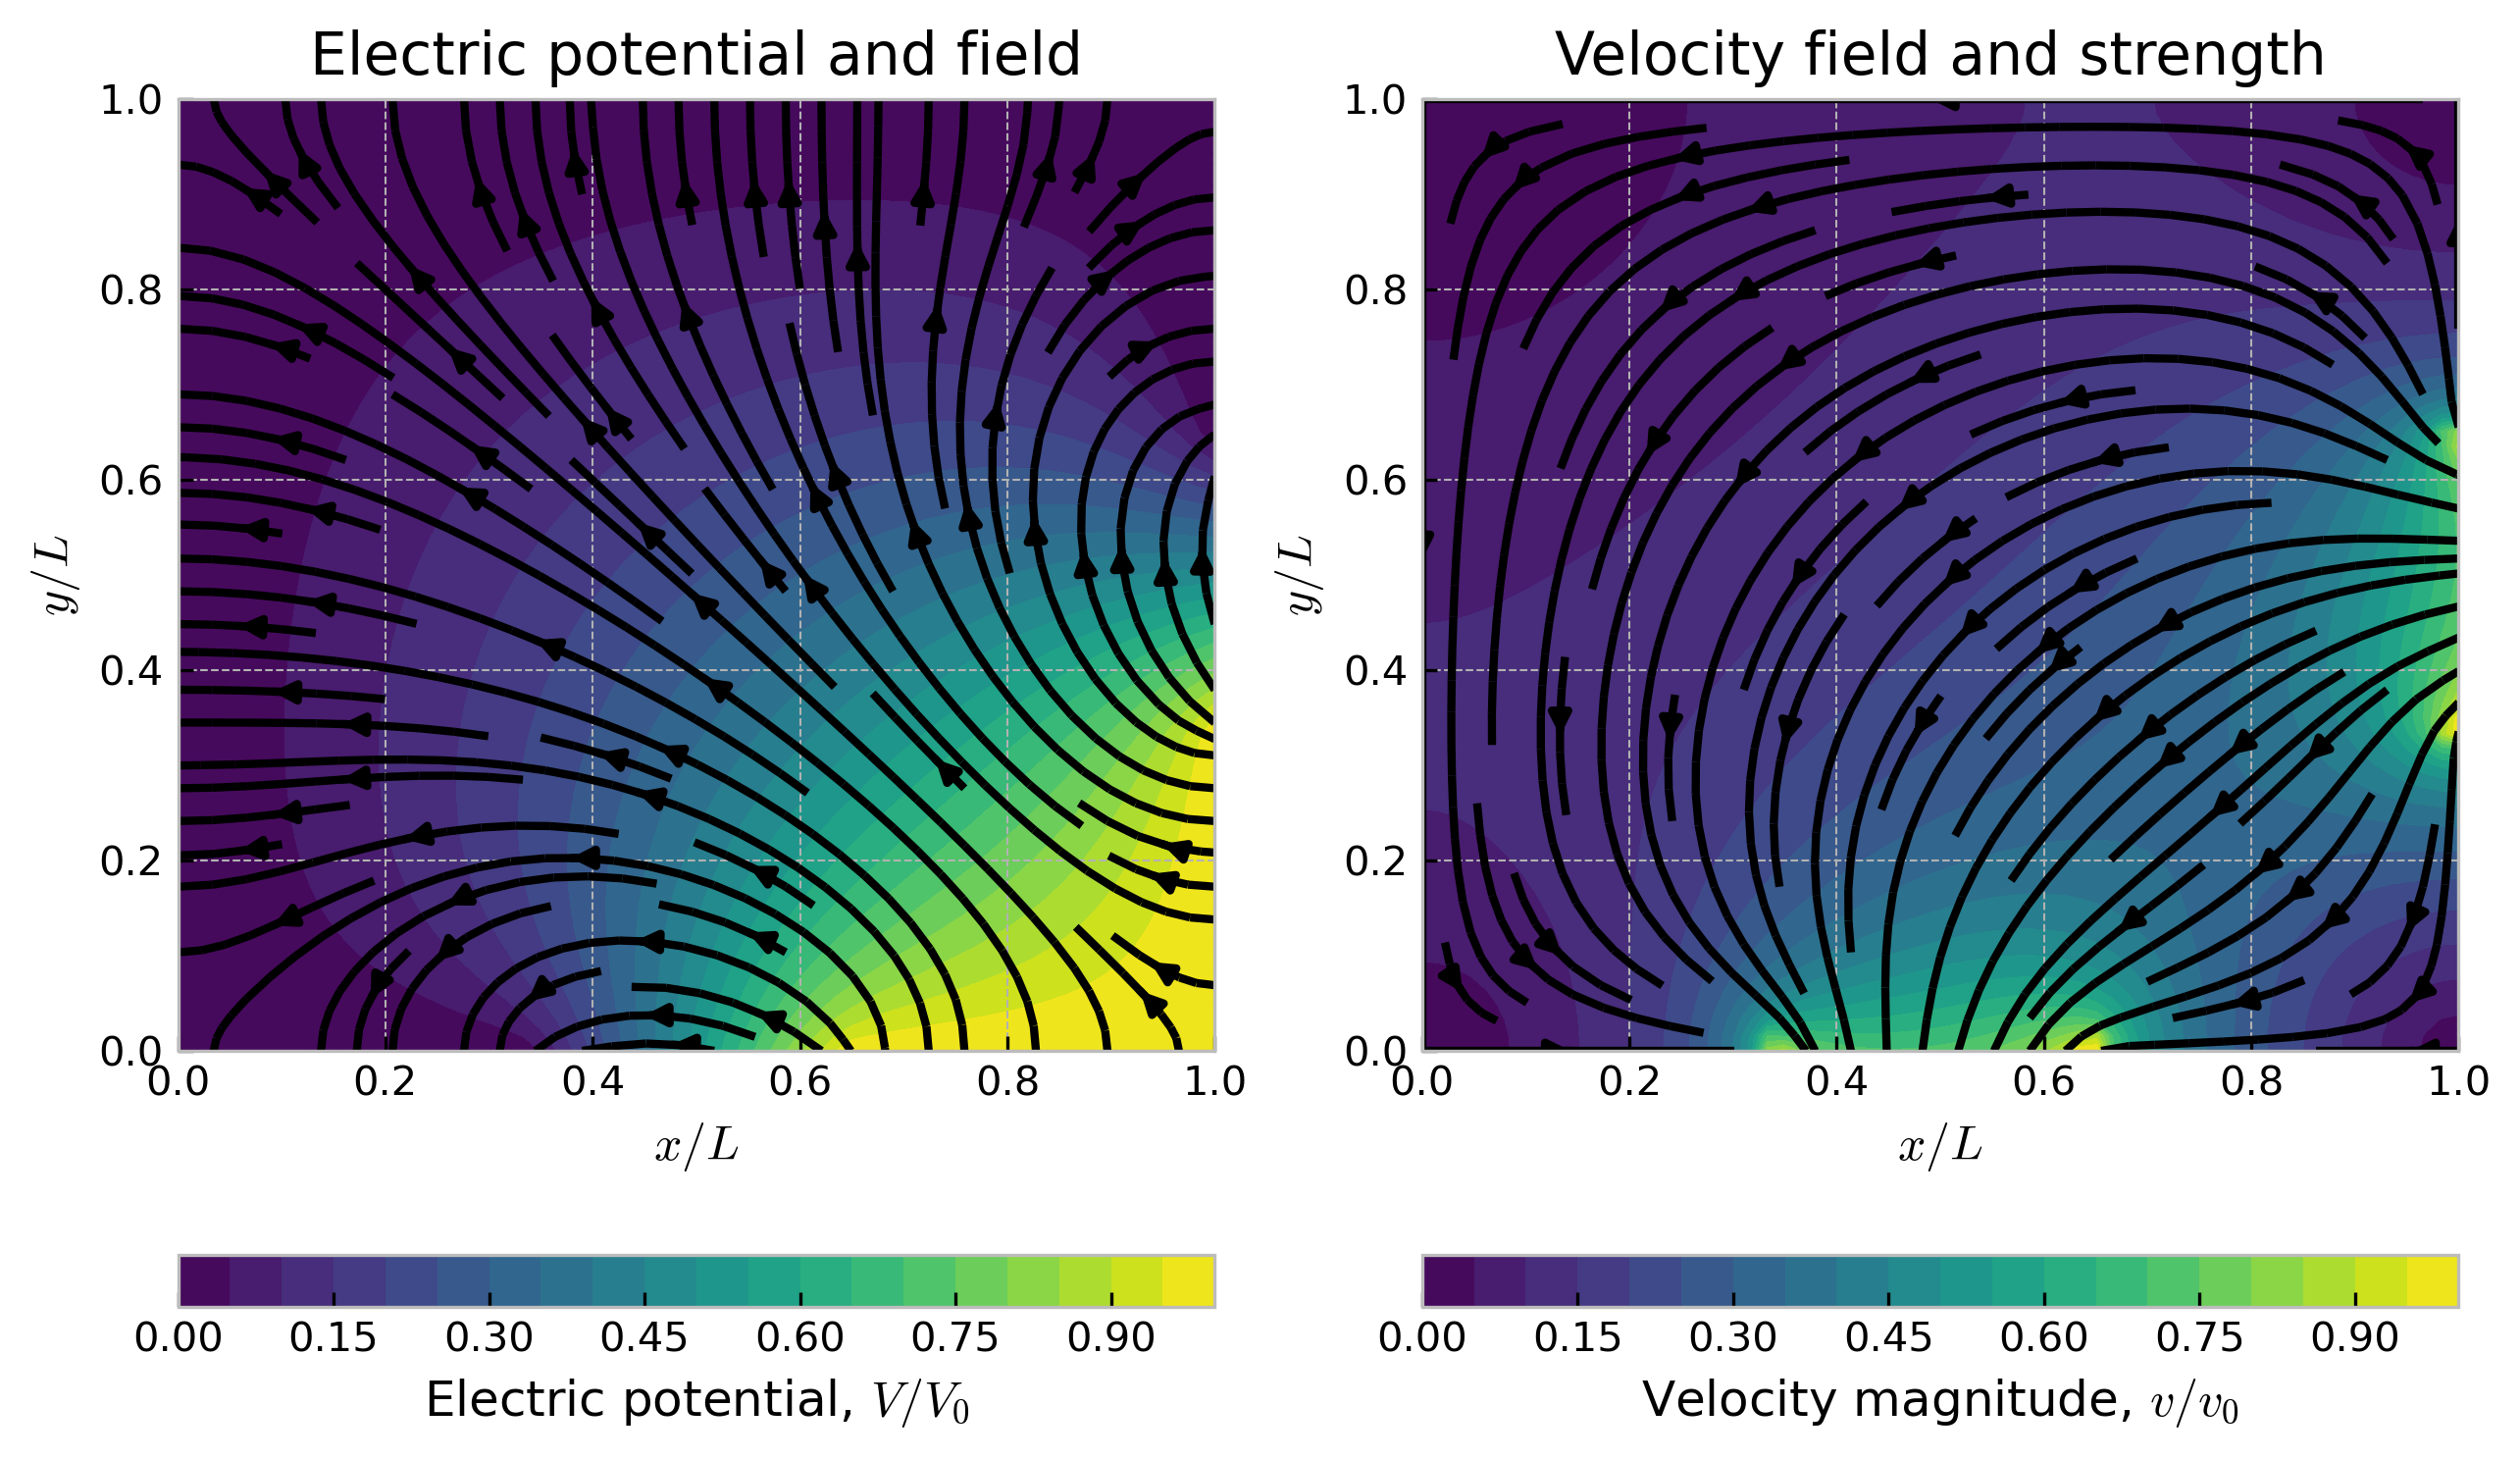

In [4]:
plot(psi, n)

Example

Consider a square domain without any sources. The Poisson equation reduces to the Laplace equation (ρ=0)
inside the domain. The boundary conditions are indicated in figure 1 below. We choose L=1, a=0 and b=1

(with the necessary dimensions) without loss of generality.

Example - Square setup Figure 1: Setup used in the example. The value of ψ
along the solid lines are a and b as indicated. ψ vary evenly between a and b

along the dotted lines.

This setup can for example model a conductor (the upper left part, a
) and a conductor with a uniformly distributed charge (the lower right part, b). The electric field is in turn given by E=∇ψ. The setup can also model the flow of an incompressible and irrotational fluid through a square cavity with uniformal inflow and outflow. The inflow and outflow being the dottet lines, respectivaly the right and bottom. The velocity field is given by V=(∂yψ,−∂xψ)

. We refer you to our seperate notebooks on stream functions and electromagnetism for more information.

To solve the Laplace equation for this setup we use the Jacobi method. We define the following functions.

https://www.numfys.net/media/notebooks/images/relaxation_square_example.png

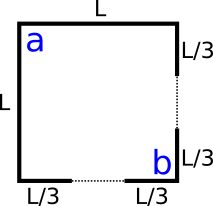
